# WECC Congestion Analysis
Vicky Hunt, 9/3/19

(excerpt from WECC Paths Report): https://www.wecc.org/Reliability/TAS_PathReports_Combined_FINAL.pdf

Step 1 – Utilization Screening

The utilization screening is intended to capture any highly utilized or potentially congested paths in the TEPPC study cases. Any path with a U75 for 50 percent of the year, U90 for 20 percent of the year, or U99 for five percent of the year is analyzed further. A path is defined as being ‘highly utilized’ if it meets any one of these screening criteria.

Step 2 – Qualitative WECC Review

WECC qualitatively reviewed and screened out paths that showed congestion based on how the modeling was performed (e.g., localized congestion due to how new generation was added to the model that would not occur in reality). Paths that were screened out were not analyzed further but were tracked throughout the process and presented for stakeholder review. The only paths that screened out in this step were the SDG&E-CFE (Path 45) and Intermountain-to-Mona (Path 28) 345-kV Paths.

Step 3 – Conditional Congestion Score

The remaining paths were scored using two normalized metrics that quantify risk, and utilization. The sum of the normalized metrics makes up the Conditional Congestion Score. If a path passed the Utilization Screening for a particular case, it was given a Conditional Congestion Score.

1. The Risk metric is a summation of the flow along a path for all hours above U90 and is an indicator of how often the path is heavily loaded and how much energy could be at risk during these periods of heavy loading. This metric is shown on the Risk View of the dashboard.

2. The Utilization metric is simply U90 and provides a way to compare the utilization of paths regardless of size. This metric is shown on the Utilization View of the dashboard.

In previous discussions, there has been significant dialogue regarding the terms “utilization” and “congestion,” and their use. Utilization is a term that describes the extent to which the transmission line (path) is used. Congestion is a word to describe at what time a transmission line may be over utilized. For purposes of this communication, high utilization is defined as the times when path flows are above 75 percent of the path rating (U75). Congestion occurs when the path flows are above 90 percent of the path rating (U90).

In [1]:
from postreise.analyze.transmission import utilization
from postreise.plot import plot_utilization_map
from powersimdata.scenario.scenario import Scenario

scenario = Scenario('224')

SCENARIO: base | WACA_Anchor_AllMatchCA_2030_SpurUpgrade_OB_5_Mesh100x5

--> State
analyze


In [2]:
from importlib import reload
reload(plot_utilization_map)
reload(utilization)
cong_all = utilization.generate_cong_stats(scenario)

Calculating utilization
--> Loading PF
--> Loading grid
Loading bus
Loading plant
Loading heat_rate_curve
Loading gencost_before
Loading gencost_after
Loading branch
Loading sub
Loading bus2sub


In [3]:
cong_all.head(n=20)

,capacity,branch_device_type,per_util1,per_util2,per_util3,bind,risk,uflag1,uflag2,uflag3,sumflag,dist
88209,185.33,Line,0.0,0.0,0.0,0,0.0,0,0,0,0,67.442376
88210,167.88,Line,0.0,0.0,0.0,0,0.0,0,0,0,0,66.304016
88211,207.43,Line,0.0,0.0,0.0,0,0.0,0,0,0,0,67.708675
88212,170.67,Line,0.0,0.0,0.0,0,0.0,0,0,0,0,15.263146
88213,201.54,Line,0.0,0.0,0.0,0,0.0,0,0,0,0,21.840264
88214,211.80,Line,0.0,0.0,0.0,0,0.0,0,0,0,0,22.781041
88215,NaN,Line,0.0,0.0,0.0,0,0.0,0,0,0,0,0.000000
88216,195.10,Line,0.0,0.0,0.0,0,0.0,0,0,0,0,30.714067
88217,NaN,Line,0.0,0.0,0.0,0,0.0,0,0,0,0,0.000000
88218,212.34,Line,0.0,0.0,0.0,0,0.0,0,0,0,0,21.079976


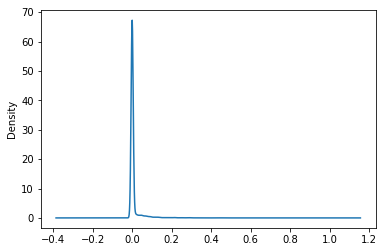

In [4]:
# kernel density plot
s = cong_all.per_util1
s.plot.kde();

In [5]:
grid = scenario.state.get_grid()
pf = scenario.state.get_pf()
utilization = utilization.get_utilization(grid.branch, pf)

--> Loading grid
Loading bus
Loading plant
Loading heat_rate_curve
Loading gencost_before
Loading gencost_after
Loading branch
Loading sub
Loading bus2sub
--> Loading PF


In [6]:
plot_utilization_map.map_utilization(utilization, grid.branch)

In [7]:
plot_utilization_map.map_binding(utilization, grid.branch)